
Aplicação Meteorológica, a tua tabela é [((2022, 1, 20), 2, 16, 0), ((2022, 1, 21), 1, 13, 0.2), ((2022, 1, 23), 6, 19, 0.6), ((2022, 1, 24), 3, 18, 0.8), ((2022, 2, 20), 6, 19, 0.2), ((2022, 2, 24), 3, 18, 0.2), ((2022, 2, 28), 3, 18, 0.2)]
        1 - Guardar tabela num ficheiro
        2 - Carregar tabela de um ficheiro
        3 - Mostrar temperatura mínima mais baixa registada
        4 - Mostrar amplitude térmica de cada dia
        5 - Mostrar dia de precipitação máxima
        6 - Mostrar dias chuvosos (> valor)
        7 - Mostrar maior sequência de dias secos
        8 - Mostrar gráfico
        0 - Sair


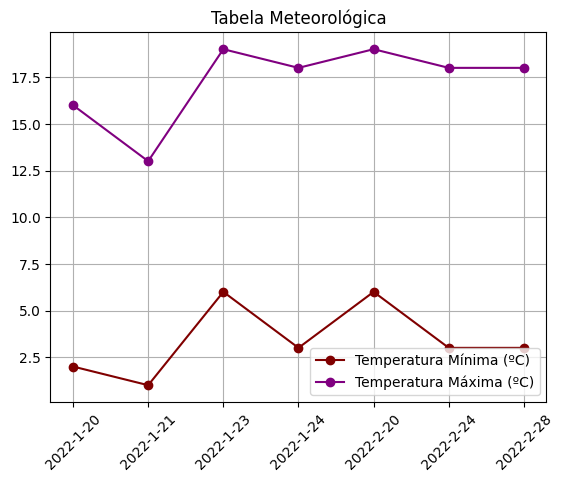

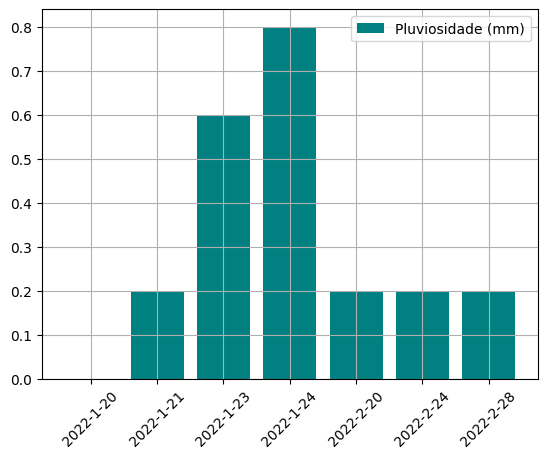


Aplicação Meteorológica, a tua tabela é [((2022, 1, 20), 2, 16, 0), ((2022, 1, 21), 1, 13, 0.2), ((2022, 1, 23), 6, 19, 0.6), ((2022, 1, 24), 3, 18, 0.8), ((2022, 2, 20), 6, 19, 0.2), ((2022, 2, 24), 3, 18, 0.2), ((2022, 2, 28), 3, 18, 0.2)]
        1 - Guardar tabela num ficheiro
        2 - Carregar tabela de um ficheiro
        3 - Mostrar temperatura mínima mais baixa registada
        4 - Mostrar amplitude térmica de cada dia
        5 - Mostrar dia de precipitação máxima
        6 - Mostrar dias chuvosos (> valor)
        7 - Mostrar maior sequência de dias secos
        8 - Mostrar gráfico
        0 - Sair
Terminada.
None


In [23]:
# Aplicação Externa

# TabMeteo = [(Data,TempMin,TempMax,Precipitacao)]
    # Data = (Int,Int,Int)
    # TempMin = Float
    # TempMax = Float
    # Precipitacao = Float

from matplotlib import pyplot as plt

tabMeteo1 = [((2022,1,20), 2, 16, 0),((2022,1,21), 1, 13, 0.2), ((2022,1,22), 7, 17, 0.01)]
tabMeteo3 = [((2022,1,20), 2, 16, 0), ((2022,1,21), 1, 13, 0.2), ((2022,1,23), 6, 19, 0.6), ((2022,1,24), 3, 18, 0.8),((2022,2,20), 6, 19, 0.2), ((2022,2,24), 3, 18, 0.2), ((2022,2,28), 3, 18, 0.2)]

def medias(tabMeteo):
    res = []
    for dia in tabMeteo:
        data = dia [0]
        tmin = dia[1]
        tmax = dia[2]
        tempMedia = (tmin+tmax)/2
        res.append((data,tempMedia))
    return res

def guardaTabMeteo(t, fnome):
    f = open(fnome, "w")
    for data,tmin,tmax,prec in t:
        ano, mes, dia = data
        f.write(f"{ano}-{mes}-{dia}; {tmin}; {tmax}; {prec}\n")
    f.close()
    return

def carregaTabMeteo(fnome):
    res = []
    f = open(fnome, "r")
    for line in f:
        line = line.strip()
        campos = line.split(";")
        data, tmin, tmax, prec = campos
        ano, mes, dia = data.split("-")
        res.append(((int(ano),int(mes),int(dia)),float(tmin),float(tmax),float(prec)))
    f.close()
    return res

tabMeteo2 = carregaTabMeteo("meteorologia.txt")

def minMin(tabMeteo):
    minima = tabMeteo[0][1]
    for i in tabMeteo:
        if i[1] < minima:
            minima = i[1]
    return minima

def amplTerm(tabMeteo):
    res = []
    for t in tabMeteo:
        data, tmin, tmax, perc = t
        soma = tmax - tmin
        res.append((data,soma))
    return res

def maxChuva(tabMeteo):
    max_prec=tabMeteo[0][3]
    for i in tabMeteo:
        if i[3] > max_prec:
            max_prec = i[3]
            max_data = i[0]
    return (max_data, max_prec)

def diasChuvosos(tabMeteo, p):
    res=[]
    for t in tabMeteo:
        if t[3] > p:
            n = (t[0],t[3])
            res.append(n)
    return res

def maxPeriodoCalor(tabMeteo, p):
    maiorCons = 0
    for t in tabMeteo:
        if t[3] < p:
            maiorCons = maiorCons + 1
        else:
            maiorCons = 0
    return maiorCons

def grafTabMeteo(t):
    x = [f"{data[0]}-{data[1]}-{data[2]}" for data,tmin,tmax,prec in t]
    ytmin = [tmin for data,tmin,tmax,prec in t]
    ytmax = [tmax for data,tmin,tmax,prec in t]
    yprec = [prec for data,tmin,tmax,prec in t]

    plt.plot(x,ytmin, label="Temperatura Mínima (ºC)", color="maroon", marker="o")
    plt.plot(x,ytmax, label="Temperatura Máxima (ºC)", color="purple", marker="o")
    plt.legend()
    plt.title("Tabela Meteorológica")
    plt.grid()
    plt.xticks(rotation=45)
    plt.show()

    plt.bar(x, yprec,label="Pluviosidade (mm)", color="teal")
    plt.legend()
    plt.xticks(rotation=45)
    plt.grid()
    plt.show()
    return

def main():
    tabMeteo3 = [
        ((2022,1,20), 2, 16, 0),
        ((2022,1,21), 1, 13, 0.2),
        ((2022,1,23), 6, 19, 0.6),
        ((2022,1,24), 3, 18, 0.8),
        ((2022,2,20), 6, 19, 0.2),
        ((2022,2,24), 3, 18, 0.2),
        ((2022,2,28), 3, 18, 0.2)
    ]

    opcao=-1
    while opcao!=0:
        print(f"""\nAplicação Meteorológica, a tua tabela é {tabMeteo3}
        1 - Guardar tabela num ficheiro
        2 - Carregar tabela de um ficheiro
        3 - Mostrar temperatura mínima mais baixa registada
        4 - Mostrar amplitude térmica de cada dia
        5 - Mostrar dia de precipitação máxima
        6 - Mostrar dias chuvosos (> valor)
        7 - Mostrar maior sequência de dias secos
        8 - Mostrar gráfico
        0 - Sair""")

        opcao=int(input("Escolha uma opção: "))

        if opcao == 1:
            nome = input("Nome do ficheiro: ")
            guardaTabMeteo(tabMeteo3, nome)
            print("Tabela guardada com sucesso!")
        elif opcao == 2:
            nome = input("Nome do ficheiro: ")
            tabMeteo3 = carregaTabMeteo(nome)
            print(tabMeteo3)
            print("Tabela carregada com sucesso!")
        elif opcao == 3:
            print("Temperatura mínima mais baixa registada:", minMin(tabMeteo3))
        elif opcao == 4:
            print("Amplitude térmica:", amplTerm(tabMeteo3))
        elif opcao == 5:
            print("Dia de precipitação máx:", maxChuva(tabMeteo3))
        elif opcao == 6:
            p = float(input("Valor mínimo de precipitação: "))
            print("Dias chuvosos:", diasChuvosos(tabMeteo3, p))
        elif opcao == 7:
            p = float(input("Valor máximo de precipitação para considerar 'seco': "))
            print("Maior sequência de dias secos:", maxPeriodoCalor(tabMeteo3, p))
        elif opcao == 8:
            grafTabMeteo(tabMeteo3)
        elif opcao == 0:
            print("Terminada.")
        else:
            print("Opção inválida.")

print(main())